In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Activation,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Model Building

In [29]:
model=Sequential()

In [30]:
#input layer 
model.add(Conv2D(16,(3,3),input_shape=(64,64,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
# specifying parameters for fully connected layer
model.add(Dropout(0.2))
model.add(Flatten())

In [35]:
model.add(Dense(units=128,kernel_initializer='uniform',activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [36]:
#output layer
model.add(Dense(units=5,activation="softmax"))

# Preprocessing image

In [1]:
from keras.preprocessing.image import ImageDataGenerator

C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


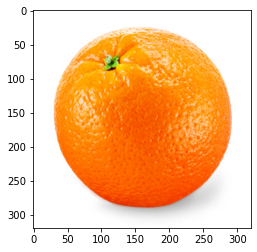

In [15]:
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=5, figsize=(5,5))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        #row.axis('off')
    show()
    
image = imread("orange_28.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

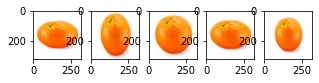

In [16]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(data_generator)

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [47]:
x_train=train_datagen.flow_from_directory(r'final_dataset/b/trainset',target_size=(64,64),batch_size=32,class_mode="categorical")

Found 349 images belonging to 5 classes.


In [41]:
print(x_train.class_indices)

{'Apple': 0, 'Banana': 1, 'Mango': 2, 'Orange': 3, 'Pear': 4}


In [42]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [48]:
x_test=test_datagen.flow_from_directory(r'final_dataset/b/testset',target_size=(64,64),batch_size=32,class_mode="categorical")

Found 150 images belonging to 5 classes.


# Training model

In [49]:
model.save("fruit_predict.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [50]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
# creating a file to save the trained CNN model 
#checkpointer = ModelCheckpoint(filepath = 'fruit_predict.h5', verbose = 1, save_best_only = True)

# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200) ,callbacks=[checkpointer]

#steps per epoch=279/32;validation_step=120/32,int(x_train.n/32)
history=model.fit(x_train,steps_per_epoch=10,epochs=30,validation_data=x_test,validation_steps=5,shuffle=True)

C:\Users\Amol\AppData\Local\Programs\Python\Python37\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
10/10 [==============================] - 15s 1s/step - loss: 1.3738 - accuracy: 0.5773 - val_loss: 3.2576 - val_accuracy: 0.3467
Epoch 2/30
10/10 [==============================] - 3s 342ms/step - loss: 0.8579 - accuracy: 0.6625 - val_loss: 0.9060 - val_accuracy: 0.6800
Epoch 3/30
10/10 [==============================] - 4s 364ms/step - loss: 0.6642 - accuracy: 0.7445 - val_loss: 0.8693 - val_accuracy: 0.6867
Epoch 4/30
10/10 [==============================] - 4s 420ms/step - loss: 0.5605 - accuracy: 0.7634 - val_loss: 1.0975 - val_accuracy: 0.6867
Epoch 5/30
10/10 [==============================] - 4s 354ms/step - loss: 0.5548 - accuracy: 0.8013 - val_loss: 0.7537 - val_accuracy: 0.7133
Epoch 6/30
10/10 [==============================] - 4s 390ms/step - loss: 0.4315 - accuracy: 0.8265 - val_loss: 1.0559 - val_accuracy: 0.6267
Epoch 7/30
10/10 [==============================] - 4s 350ms/step - loss: 0.3938 - accuracy: 0.8531 - val_loss: 0.8804 - val_accuracy: 0.6667
Epoch 8/

In [67]:
model.save("fruit_predict.h5")

In [68]:
model.load_weights('fruit_predict.h5')

In [52]:
score = model.evaluate(x_train)
print('Train accuracy:', score[1])

11/11 [==============================] - 2s 219ms/step - loss: 0.2943 - accuracy: 0.8682
Train accuracy: 0.8681948184967041


In [53]:
score = model.evaluate(x_test)
print('Test accuracy:', score[1])

5/5 [==============================] - 1s 127ms/step - loss: 0.7782 - accuracy: 0.7400
Test accuracy: 0.7400000095367432


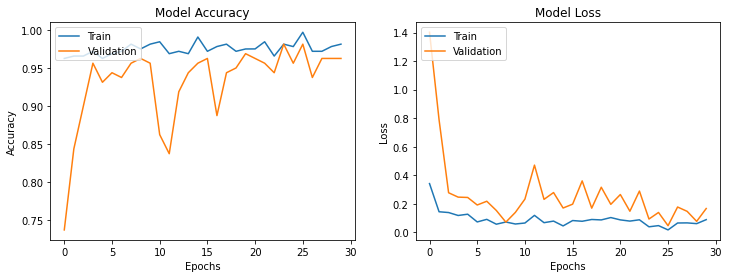

In [72]:
# plotting model accuracy 
plt.figure(figsize=(12,4),facecolor='w')  
plt.subplot(1,2,1)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epochs')  
plt.legend(['Train', 'Validation'], loc='upper left')   

# plotting model loss 
plt.subplot(1,2,2)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epochs')  
plt.legend(['Train', 'Validation'], loc='upper left')  
plt.show()

In [ ]:
import os
from os import listdir

root_dir = 'final_dataset/trainset'
rows = 3
cols = 5
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25),facecolor='w')
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [73]:
# using model to predict on test data
Y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(x_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

<Figure size 1440x1080 with 0 Axes>

[[39 36 34 45 36]
 [45 38 38 45 24]
 [39 39 47 30 35]
 [40 44 37 30 39]
 [33 37 33 31 26]]


<Figure size 432x288 with 0 Axes>

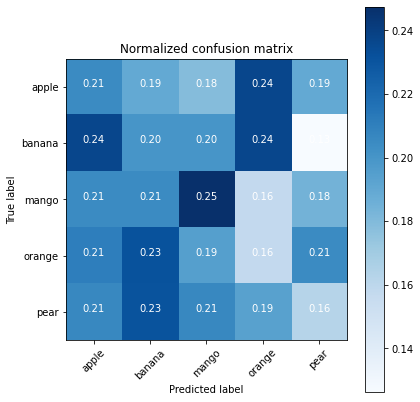

In [78]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=x_test)
y_pred = [np.argmax(probas) for probas in predictions]
#y_pred = x_test.classes
y_test = x_test.classes
class_names = x_test.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,6),facecolor='w')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=1)
print(cnf_matrix)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [77]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test , batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

29/29 [==============================] - 2s 66ms/step
              precision    recall  f1-score   support

           0       0.21      0.22      0.22       190
           1       0.19      0.19      0.19       190
           2       0.19      0.18      0.18       190
           3       0.18      0.17      0.17       190
           4       0.20      0.20      0.20       160

    accuracy                           0.19       920
   macro avg       0.19      0.19      0.19       920
weighted avg       0.19      0.19      0.19       920

